<a href="https://colab.research.google.com/github/ErickMartinezz/ProcesamientodelHabla/blob/main/webscrapping_ErickMartinez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP1 PROCESAMIENTO DEL HABLA

ERICK MARTINEZ

Sitio web : https://www.lanacion.com.ar/cultura/emociones-variables-nid21022021/

#  Emociones variables



## 1- Webscrapping

In [ ]:
! pip install requests beautifulsoup4 html5lib


In [ ]:
import requests
from bs4 import BeautifulSoup

# URL del artículo
url = "https://www.lanacion.com.ar/cultura/emociones-variables-nid21022021/"

# Petición al sitio
response = requests.get(url)

# Verificamos si la respuesta fue exitosa
if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')

    # Título del artículo
    titulo = soup.find('h1')
    print("📰 TÍTULO DEL ARTÍCULO:\n", titulo.text.strip() if titulo else "No encontrado")

    # Subtítulo (si existe)
    subtitulo = soup.find('h2')
    if subtitulo:
        print("\n📝 SUBTÍTULO:\n", subtitulo.text.strip())

      # Extraemos todos los párrafos
    parrafos = soup.find_all('p')
    contenido = [p.get_text(strip=True) for p in parrafos]

    # Unimos todo el contenido en un solo string
    texto_completo = " ".join(contenido)

    # Buscamos el inicio y fin del fragmento que nos interesa
    inicio = texto_completo.find("El científico británico J. B. S. ")
    fin = texto_completo.find("construye estas experiencias increíbles.") + len("construye estas experiencias increíbles.")

    if inicio != -1 and fin != -1:
        fragmento_completo = texto_completo[inicio:fin]
        print("🧠 FRAGMENTO EXTRAÍDO:\n")
        print(fragmento_completo)
    else:
        print("❌ No se encontraron los límites del fragmento.")

else:
    print(f"❌ Error al acceder a la página: {response.status_code}")


📰 TÍTULO DEL ARTÍCULO:
 Emociones variables

📝 SUBTÍTULO:
 Un nuevo paradigma obliga  a repensar nuestras actitudes  y a modificar la mirada interna
🧠 FRAGMENTO EXTRAÍDO:

El científico británico J. B. S. Haldane decía que cuando aparecen nuevas ideas en el mundo de la ciencia lo primero que se escucha de los colegas es “lo que dicen no tiene sentido”; luego, con el tiempo, se convierte en “esto es raro pero interesante”, para seguir con “esto es verdad, ¿y qué?”, y finalmente terminar con un rotundo “siempre dije que esto era así”. ¿Será igual en el mundo de las emociones? Cada vez existe mayor evidencia científica que demuestra que nos hallamos ante uncambio de paradigmaen cuanto a la comprensión de qué son lasemociones. Desde el abordaje de las emociones primarias de Paul Elkman en los años setenta hasta la nueva teoría construccionista de Sarah Feldman Barret, unos años atrás, ha pasado mucha agua bajo el puente. Podríamos afirmar que estamos frente a una revolución respecto de la 

## Limpieza de texto

 Pasar el texto a minuscula. Use el siguiente prompt  (me corrigio el codigo).

 prompt: fragmento= fragmento[0]
 fragmento.lower()

In [ ]:
fragmento = fragmento_completo.lower()
fragmento


'el científico británico j. b. s. haldane decía que cuando aparecen nuevas ideas en el mundo de la ciencia lo primero que se escucha de los colegas es “lo que dicen no tiene sentido”; luego, con el tiempo, se convierte en “esto es raro pero interesante”, para seguir con “esto es verdad, ¿y qué?”, y finalmente terminar con un rotundo “siempre dije que esto era así”. ¿será igual en el mundo de las emociones? cada vez existe mayor evidencia científica que demuestra que nos hallamos ante uncambio de paradigmaen cuanto a la comprensión de qué son lasemociones. desde el abordaje de las emociones primarias de paul elkman en los años setenta hasta la nueva teoría construccionista de sarah feldman barret, unos años atrás, ha pasado mucha agua bajo el puente. podríamos afirmar que estamos frente a una revolución respecto de la comprensión de las emociones, pero también de lamentey elcerebroen general. esto es clave: tu mente son tus pensamientos y emociones . tu mente es tu cerebro en acción . e

Eliminar signos de puntuacion

In [ ]:
import re
import string

fragmento = re.sub(r'[^\w\s]', '', fragmento)

fragmento


'el científico británico j b s haldane decía que cuando aparecen nuevas ideas en el mundo de la ciencia lo primero que se escucha de los colegas es lo que dicen no tiene sentido luego con el tiempo se convierte en esto es raro pero interesante para seguir con esto es verdad y qué y finalmente terminar con un rotundo siempre dije que esto era así será igual en el mundo de las emociones cada vez existe mayor evidencia científica que demuestra que nos hallamos ante uncambio de paradigmaen cuanto a la comprensión de qué son lasemociones desde el abordaje de las emociones primarias de paul elkman en los años setenta hasta la nueva teoría construccionista de sarah feldman barret unos años atrás ha pasado mucha agua bajo el puente podríamos afirmar que estamos frente a una revolución respecto de la comprensión de las emociones pero también de lamentey elcerebroen general esto es clave tu mente son tus pensamientos y emociones  tu mente es tu cerebro en acción  es decir es tu cerebro el que te

### 2.1 Muestra las stop words que tenga tu texto.

In [ ]:
import nltk
from nltk.corpus import stopwords

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# prompt: import nltk
# nltk.download('stopwords')
# from nltk.corpus import stopwords
# stopwords_es = set(stopwords.words('spanish'))
# # filtradas = [p for p in palabras if p not in stopwords_es]
# print(filtradas)

from nltk.corpus import stopwords
stopwords_es = set(stopwords.words('spanish'))
stopwords_es

{'a',
 'al',
 'algo',
 'algunas',
 'algunos',
 'ante',
 'antes',
 'como',
 'con',
 'contra',
 'cual',
 'cuando',
 'de',
 'del',
 'desde',
 'donde',
 'durante',
 'e',
 'el',
 'ella',
 'ellas',
 'ellos',
 'en',
 'entre',
 'era',
 'erais',
 'eran',
 'eras',
 'eres',
 'es',
 'esa',
 'esas',
 'ese',
 'eso',
 'esos',
 'esta',
 'estaba',
 'estabais',
 'estaban',
 'estabas',
 'estad',
 'estada',
 'estadas',
 'estado',
 'estados',
 'estamos',
 'estando',
 'estar',
 'estaremos',
 'estará',
 'estarán',
 'estarás',
 'estaré',
 'estaréis',
 'estaría',
 'estaríais',
 'estaríamos',
 'estarían',
 'estarías',
 'estas',
 'este',
 'estemos',
 'esto',
 'estos',
 'estoy',
 'estuve',
 'estuviera',
 'estuvierais',
 'estuvieran',
 'estuvieras',
 'estuvieron',
 'estuviese',
 'estuvieseis',
 'estuviesen',
 'estuvieses',
 'estuvimos',
 'estuviste',
 'estuvisteis',
 'estuviéramos',
 'estuviésemos',
 'estuvo',
 'está',
 'estábamos',
 'estáis',
 'están',
 'estás',
 'esté',
 'estéis',
 'estén',
 'estés',
 'fue',
 'f

### 2.2 Quita las stop-words, caracteres extraños del texto. Utiliza el texto restante para crear una nube de palabras. Usa la biblioteca worldcloud de python.

In [ ]:
palabras = fragmento.split()
filtradas = [p for p in palabras if p not in stopwords_es]
filtradas


['científico',
 'británico',
 'j',
 'b',
 's',
 'haldane',
 'decía',
 'aparecen',
 'nuevas',
 'ideas',
 'mundo',
 'ciencia',
 'primero',
 'escucha',
 'colegas',
 'dicen',
 'luego',
 'tiempo',
 'convierte',
 'raro',
 'interesante',
 'seguir',
 'verdad',
 'finalmente',
 'terminar',
 'rotundo',
 'siempre',
 'dije',
 'así',
 'igual',
 'mundo',
 'emociones',
 'cada',
 'vez',
 'existe',
 'mayor',
 'evidencia',
 'científica',
 'demuestra',
 'hallamos',
 'uncambio',
 'paradigmaen',
 'cuanto',
 'comprensión',
 'lasemociones',
 'abordaje',
 'emociones',
 'primarias',
 'paul',
 'elkman',
 'años',
 'setenta',
 'nueva',
 'teoría',
 'construccionista',
 'sarah',
 'feldman',
 'barret',
 'años',
 'atrás',
 'pasado',
 'mucha',
 'agua',
 'bajo',
 'puente',
 'podríamos',
 'afirmar',
 'frente',
 'revolución',
 'respecto',
 'comprensión',
 'emociones',
 'lamentey',
 'elcerebroen',
 'general',
 'clave',
 'mente',
 'pensamientos',
 'emociones',
 'mente',
 'cerebro',
 'acción',
 'decir',
 'cerebro',
 'permite

# **Wordcloud**

In [ ]:
!pip install wordcloud

In [ ]:
# Importar librerías
from wordcloud import WordCloud
import matplotlib.pyplot as plt

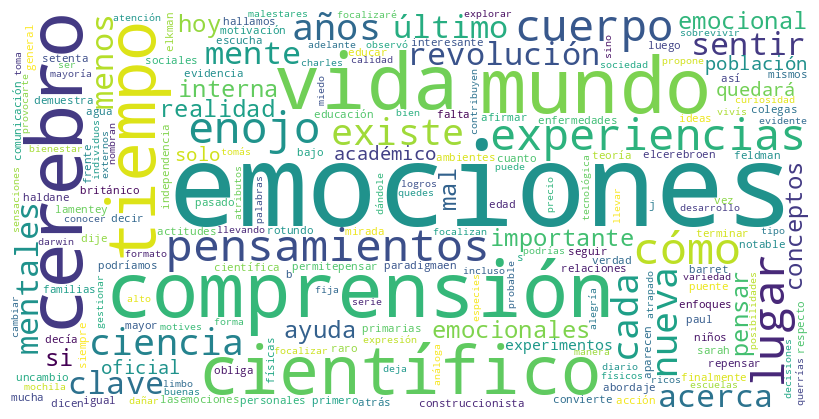

In [ ]:
# Convertir la lista de oraciones en una única cadena de texto
texto_wordcloud = " ".join(filtradas)

# Crear un objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(texto_wordcloud)

# mostramos la imagen generada
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### 2.3 Usando el texto que conseguiste en el punto 1).



#### 2.3.1 Limpia y preprocesa el texto, descomponelo en oraciones, arma una matriz documento-vocabulario.



#### 2.3.2 Determina la longitud de tu vocabulario.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

nltk.download('punkt_tab')  # Tokenizador de oraciones
nltk.download('stopwords')  # Palabras vacías
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# prompt: descomponer el texto en oraciones

from nltk.tokenize import sent_tokenize

# Assuming 'fragmento' variable holds the text from previous code
oraciones = sent_tokenize(fragmento_completo)
print ("Oraciones encontradas:")


oraciones


Oraciones encontradas:


['El científico británico J.',
 'B. S. Haldane decía que cuando aparecen nuevas ideas en el mundo de la ciencia lo primero que se escucha de los colegas es “lo que dicen no tiene sentido”; luego, con el tiempo, se convierte en “esto es raro pero interesante”, para seguir con “esto es verdad, ¿y qué?”, y finalmente terminar con un rotundo “siempre dije que esto era así”.',
 '¿Será igual en el mundo de las emociones?',
 'Cada vez existe mayor evidencia científica que demuestra que nos hallamos ante uncambio de paradigmaen cuanto a la comprensión de qué son lasemociones.',
 'Desde el abordaje de las emociones primarias de Paul Elkman en los años setenta hasta la nueva teoría construccionista de Sarah Feldman Barret, unos años atrás, ha pasado mucha agua bajo el puente.',
 'Podríamos afirmar que estamos frente a una revolución respecto de la comprensión de las emociones, pero también de lamentey elcerebroen general.',
 'Esto es clave: tu mente son tus pensamientos y emociones .',
 'Tu ment

In [ ]:
# prompt: Armar una matriz documento-vocabulario

from sklearn.feature_extraction.text import CountVectorizer

# Assuming 'oraciones' variable holds the list of sentences from previous code
vectorizador = CountVectorizer()

X = vectorizador.fit_transform(oraciones)

In [ ]:
import numpy as np
np.set_printoptions(linewidth=167)
np.set_printoptions(threshold=np.inf)

# Mostrar la matriz en formato numérico de las palabras que se repite en la frase.
print("Matriz documento-vocabulario:\n", X.toarray()[:5])

Matriz documento-vocabulario:
 [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 3 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 2 0 0
  0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 1 

In [ ]:
# prompt: mostrar palabras del vocabulario
vocabulario = vectorizador.get_feature_names_out()
print("Palabras del vocabulario:")
vocabulario


Palabras del vocabulario:


array(['abordaje', 'académico', 'académicos', 'acción', 'acerca', 'actitudes', 'adelante', 'aeroportuaria', 'afirmar', 'agua', 'alegría', 'alto', 'ambientes',
       'análoga', 'aparecen', 'artículos', 'asumiendo', 'asumir', 'asunciones', 'así', 'atención', 'atrapado', 'atributos', 'atrás', 'ayuda', 'años', 'bajo',
       'barret', 'basa', 'bien', 'bienestar', 'biológicos', 'británico', 'buenas', 'cada', 'calidad', 'cambiar', 'cambios', 'cara', 'cardíaco', 'causa', 'cerebro',
       'ceño', 'charles', 'ciencia', 'cientos', 'científica', 'científico', 'científicos', 'clave', 'colegas', 'comprensión', 'comunicación', 'comunidad',
       'conceptos', 'confianza', 'conocer', 'construccionista', 'construye', 'contexto', 'contribuyen', 'contribuyentes', 'convierte', 'corazón', 'corporales',
       'cosa', 'cuanto', 'cuerpo', 'curiosidad', 'cuál', 'cáncer', 'cómo', 'darwin', 'dañar', 'decir', 'decisiones', 'decrecerá', 'decía', 'definen', 'deja',
       'demuestra', 'demuestran', 'demás', 'de

In [ ]:
# Determina la longitud de tu vocabulario.
longitud_vocabulario = len(vectorizador.vocabulary_)
print(f"La longitud del vocabulario es: {longitud_vocabulario}")


La longitud del vocabulario es: 287



#### 2.3.3. Aplica TF-IDF a tu matriz documento-vocabulario

In [ ]:
# prompt: Aplica TF-IDF a tu matriz documento-vocabulario

from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
tfidf_matrix = tfidf_transformer.fit_transform(X)

print("Matriz TF-IDF:\n", tfidf_matrix.toarray()[:5])


Matriz TF-IDF:
 [[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.66672139 0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.66672139 0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.    

# Conclusiones

Fue un trabajo que me permitio aprender un poco mas como funciona el analisis de textos, me llevo de mucha investigacion, ver videos y repasar varias veces los conceptos.
Para completar la ultima parte me fui guiando de los trabajos de algunos compañeros, y de la ayuda de la IA de colab, generando codigo y tmb reemplazando algunas palabras para corregir errores.

En cuanto al texto: se puede ver en la parte donde realice el Wordcloud como destacan varias palabras, en especial "Emociones" y no me sorprende ya que es un fragmento de un libro que justamente habla de eso!!